## Imports

In [1]:
import os
os.chdir("..")
from mlpipeline_analyzer import PipelineDiagram
from mlpipeline_analyzer import PipelineSuggest
from sklearn.svm import SVC
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.discriminant_analysis import *
from sklearn.impute import *
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import pandas as pd
import numpy as np
import joblib

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


## ML Pipeline Analyzer

### Create sklearn pipeline

In [2]:
from mlpipeline_analyzer import PipelineDiagram
from sklearn.svm import SVC
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.discriminant_analysis import *
from sklearn.impute import *
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import numpy as np
import joblib


def custom_function(set=1):
    s = 'Hello ' * set
    return

model = SVC(C=1.0, kernel='poly', degree=5, gamma='scale')
sklearn_pipeline = Pipeline([('custom', custom_function(set=10)), #-- Pipe Transformer 1
                     ("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')), #-- Pipe Transformer 2
                     ('scale', FeatureUnion([
                ('minmax', MinMaxScaler()),    #-- Parallel Transformer 3
                ('standardscaler', StandardScaler()),  #-- Parallel Transformer 4
                ('normalize', Normalizer())])),#-- Parallel Transformer 5
                     ('feature_select', RFE(estimator = model, n_features_to_select=1)), #-- Pipe Transformer 6
                     ('PCA', PCA(n_components=1)), #-- Pipe Transformer 7
            ("LDA", LinearDiscriminantAnalysis()), #-- Pipe Transformer 8
            #('classifier', model), 	      #-- Pipe Classifier/Predictor 9
('voting', RandomForestClassifier(n_estimators=10))]) 	      #-- Pipe Classifier/Predictor 10

joblib.dump(sklearn_pipeline , 'examples/sample_models/ml_pipeline.pkl')

['examples/sample_models/ml_pipeline.pkl']

### show()

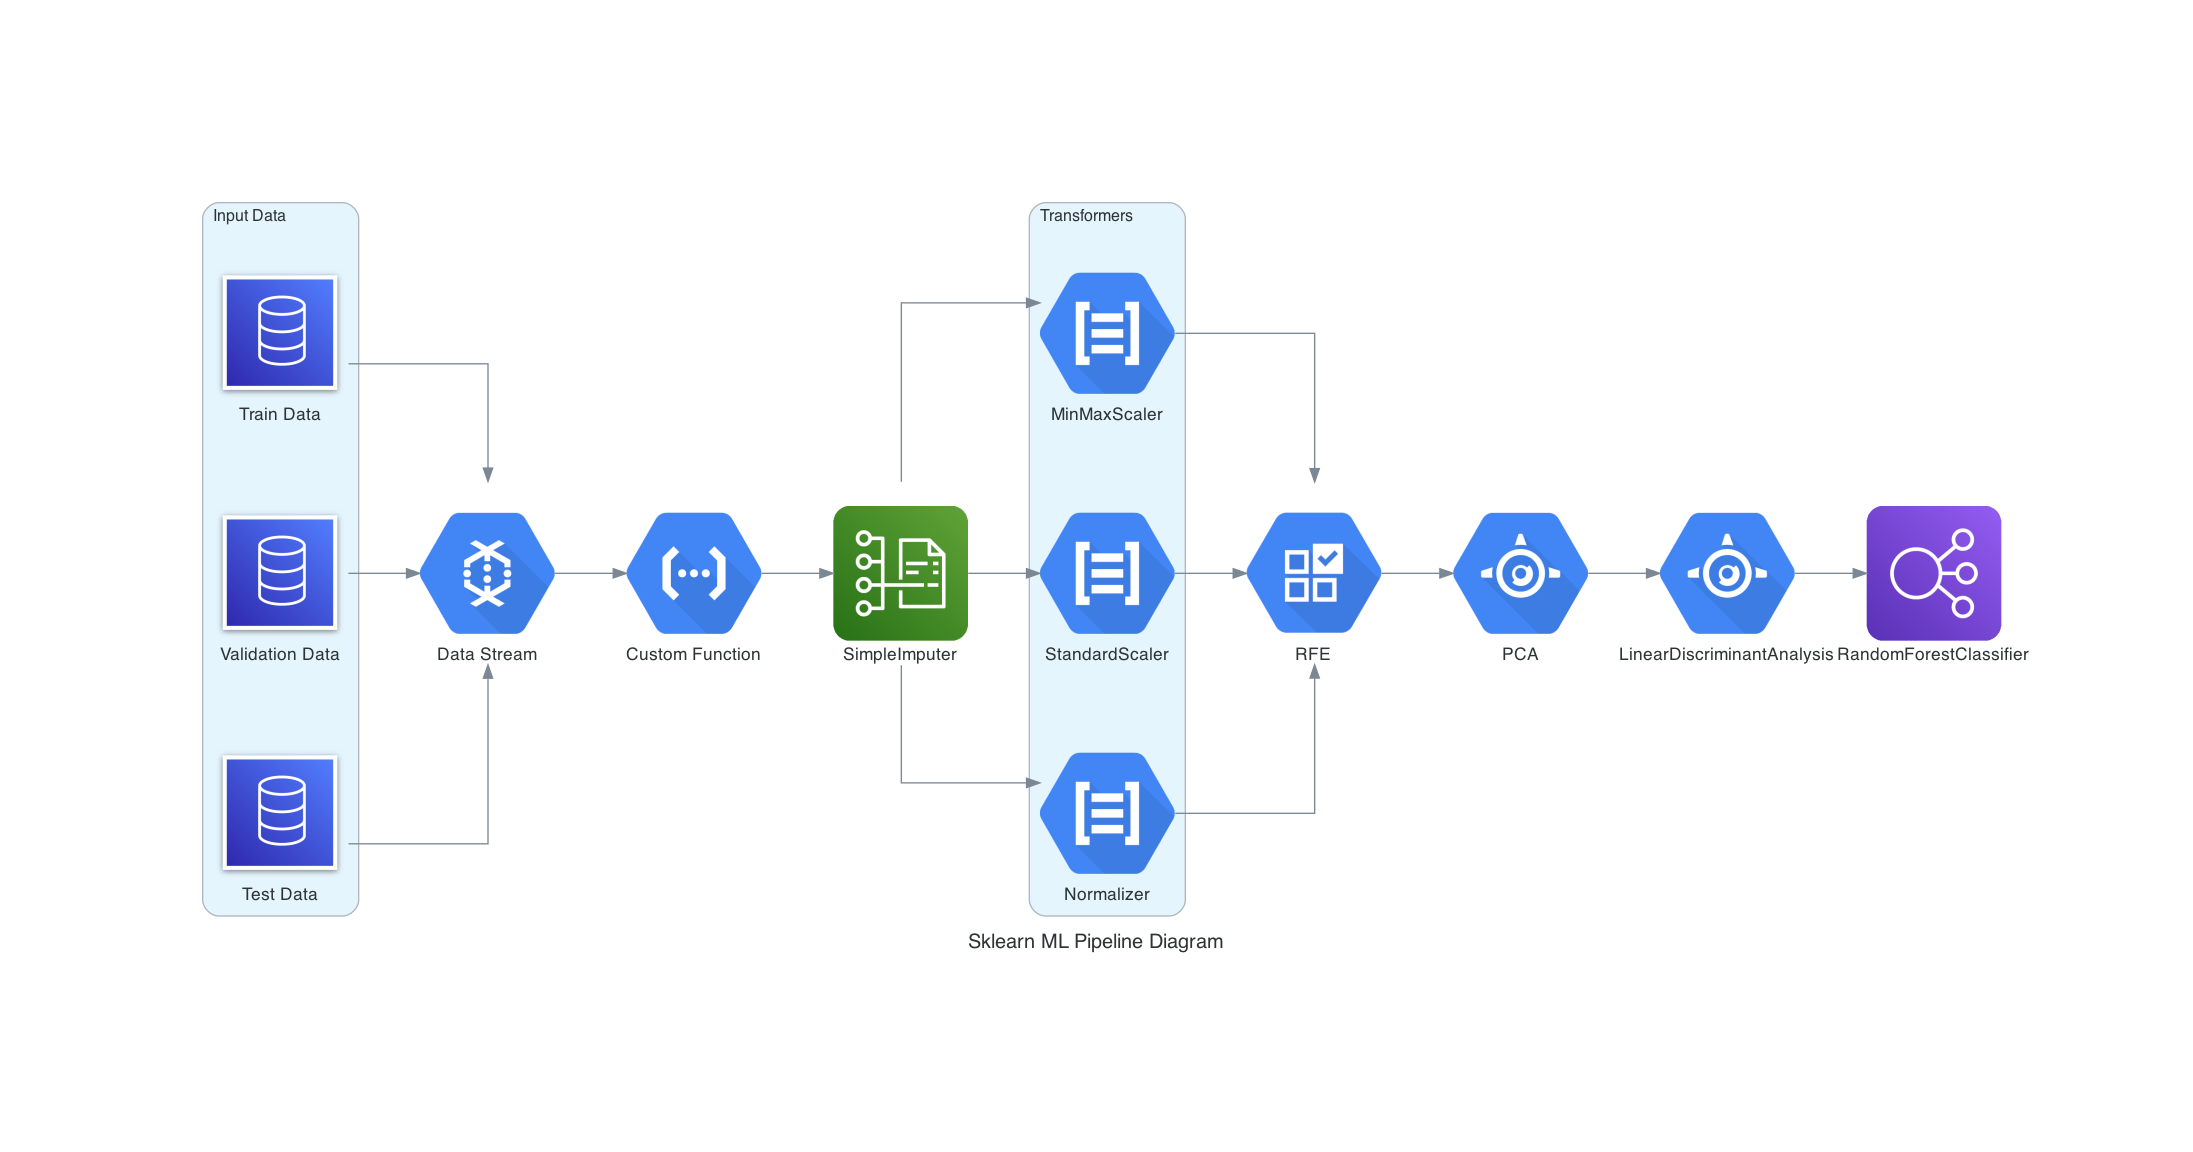

In [3]:
from mlpipeline_analyzer import PipelineDiagram
import joblib
sklearn_pipeline = joblib.load('examples/sample_models/ml_pipeline.pkl')
a = PipelineDiagram(sklearn_pipeline)
a.show(title='Sklearn ML Pipeline Diagram')

### show_params()

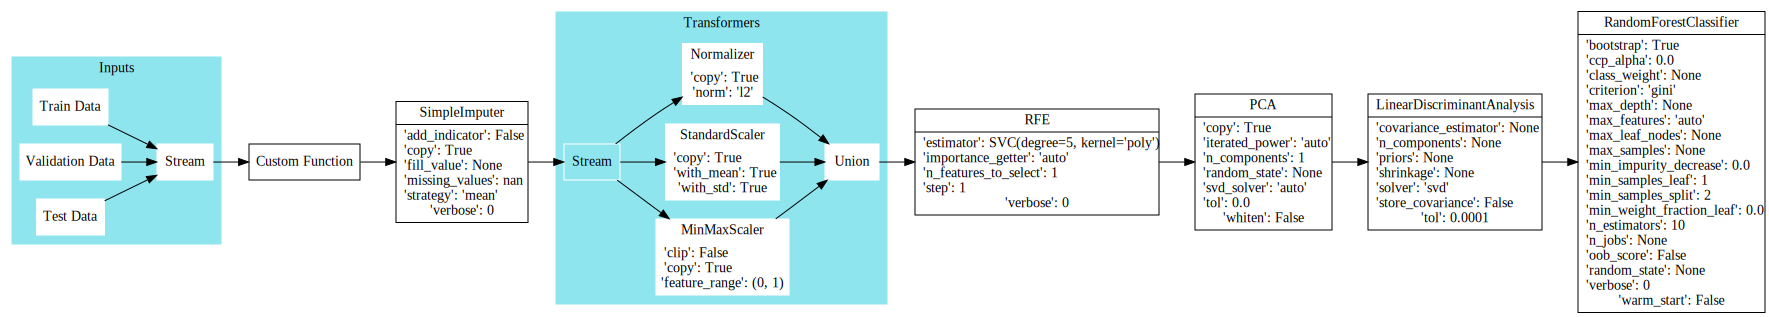

In [4]:
a.show_params(title='Sklearn Machine Learning Parameters Pipeline')

## ML Pipeline Suggestor

In [5]:
data = pd.read_csv('tests/test_mlpipeline_analyzer/test_suggest/sample_data/income_classification.csv')
response = 'income'
predictor = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
             'hours-per-week', 'native-country']

problem_type = 'binary' 
objective = 'F1'

In [6]:
ps = PipelineSuggest()
ps.fit(data, response, predictor, problem_type, objective)

### Suggest feature engineering steps of the best pipeline

In [7]:
ps.suggest('fe')

'Label Encoder + Select Columns By Type Transformer + Label Encoder + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder'

### Suggest model of the best pipeline

In [8]:
ps.suggest('model')

'LightGBM Classifier'

### Suggest the entire best pipeline

In [9]:
ps.suggest('all')

'LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder'

### Use ML Pipeline Visualizer to visualize the best pipeline

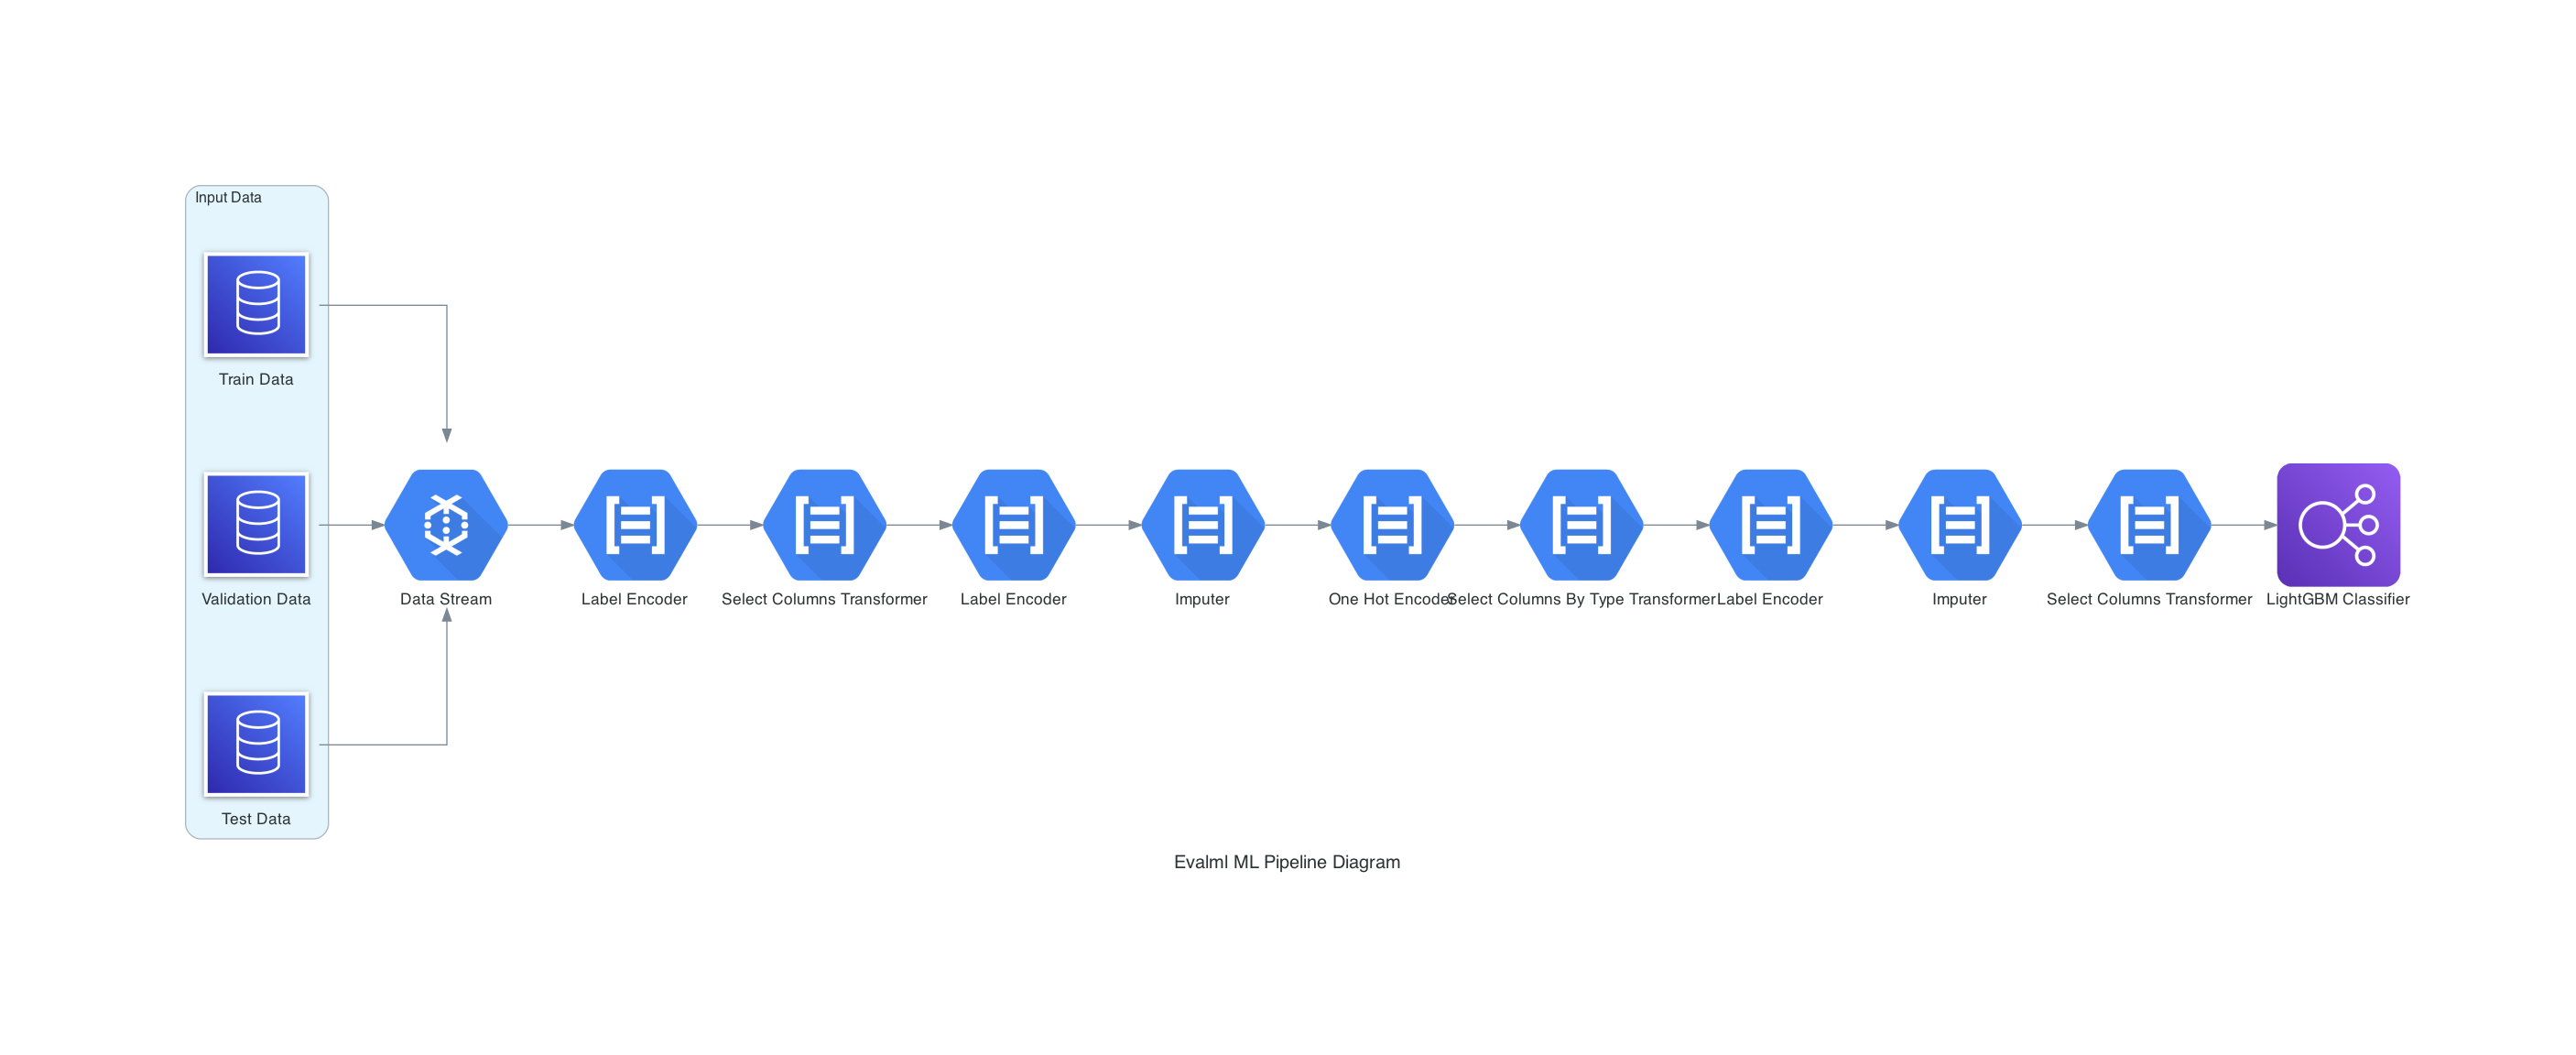

In [12]:
b = PipelineDiagram(ps.best_pipeline)
b.show(title='Evalml ML Pipeline Diagram')

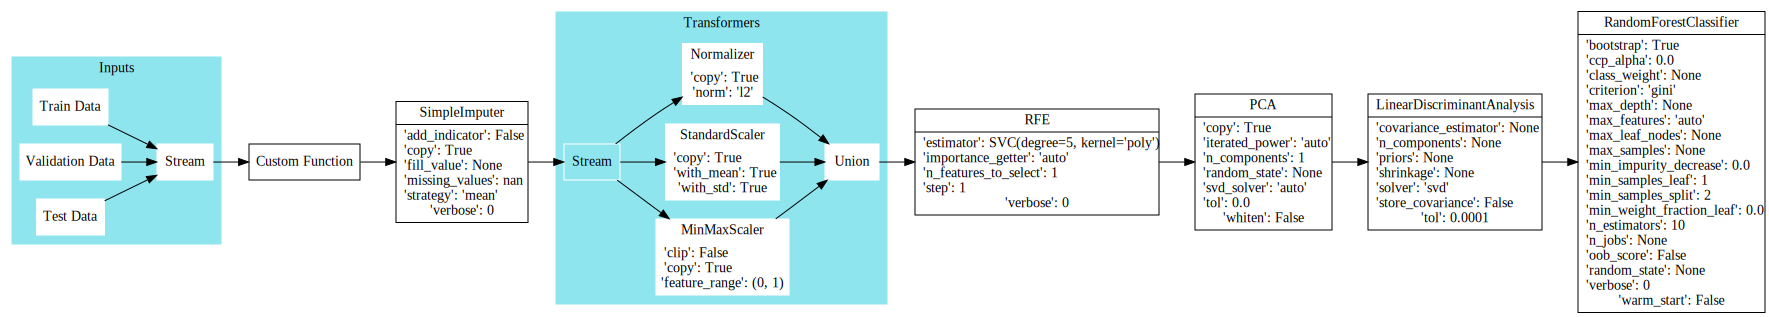

In [13]:
a.show_params(title='Evalml Machine Learning Parameters Pipeline')

### Access evalml functionality

In [14]:
# EvalML object
best_pipeline = ps.best_pipeline

In [15]:
# Make use of EvalML attributes
best_pipeline.feature_importance

,feature,importance
0,age,543
1,fnlwgt,473
2,hours-per-week,306
3,capital-gain,257
4,education-num,242
...,...,...
59,workclass_ Never-worked,0
60,workclass_ Without-pay,0
61,education_ 7th-8th,0
62,marital-status_ Married-AF-spouse,0
